# Deep Learning 2019
## Assignment 8 - Unsupervised Approaches
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __June 25th, 2019, 9AM__. Before your submission please replace fields __[Name]__ and __[Mat. No.]__ with your own name and registration number respectively (please keep the brackets), and replace the __X__ in the filename with the number of the current assignment.

Programming assignments have to be completed using Python 3. __Please do NOT use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Autoencoder's Basics
Please answer the following questions regarding autoencoders:

1. Is an Autoencoder for supervised learning or for unsupervised learning? Please explain your answer briefly.
2. What is the difference between an _Undercomplete_ and _Overcomplete_ Autoencoder?
3. What is the objective of Denoising Autoencoders and Contractive Autoencoders?
4. What is the similarity between autoencoder and PCA? How are the two different? What constrain would you apply to an autoencoder to make it similar to a PCA method?

#### solution:
1. Autoencoder is for unsupervised learning. An autoencoder learns non-linear underlying structure to represent the data distribution. It does not learn correspondence between some input data and labels. Therefore it is for unsupervised learning
2. Both under- and overcomplete autoencoder learn implicit representation in the hidden space. 
    1. The dimension of an under complete Autoencoder is lower than the original data (bottle-neck) and thus is "data compression"\*. 
    2. The overcomplete autoencoder learns hidden representation whose dimension is larger than the original data and thus is a data sparsification. The overcomplete autoencoders are usually trained with sparsity regularization to prevent that the neurons in the hidden layers completely remember the data instead of learning the hidden structure.
3. Both denoising Autoencoder and contractive Autoencoder are for learning such robust representation of input data, that they are robust against the purterbation on the input thus avoid from overfitting.
    1. The denoising Autoencoders learns the hidden representation from the data that is perturbed by a noise and try to construct the data without the noise. The objective of denoising Autoencoders are calculated by comparing the reconstructed data with the de-noising one, so that the trained Autoendoders are robust against disturbance and prevents the overcomplete Autoencoders from completly copying the data.<br\>The objective of denoising Autoencoder is to reduce the reconstruction loss:
    $$
    \mathbf{L}_{denoising}(\mathbf{x}, \mathbf{z})=\mathbf{L}_{recon}(\mathbf{x}, g_{\theta'}(f_\theta(\tilde{x}))),
    $$
    where $\mathbf{x}$ is (uncorrupted) input data and $\tilde(x)\sim q_\mathcal{D}(\tilde{x}|\mathbf{x})$ by means of stochastic mapping, $f_\theta$ is the encoder function, $g_{\theta'}$ is the decoder function and thus $\mathbf{z}$ is the reconstructed result. The reconstruction loss $\mathbb{L}_{recon}$ can be either squared error loss or cross-entropy.
    2. Different from the denoising Autoencoder, contractive Autoencoder adds an additional regularization term to the reconstruction loss:
    $$
    \mathbf{L}_{contractive}(\mathbf{x}, \mathbf{z}) = \sum_{x\in \mathcal{D}_n}\mathbf{L}_{recon}(\mathbf{x}, g_{\theta'}(f_\theta(\tilde{x})) + \lambda ||\mathbf{J}_f(\mathbf{x})||_F^2),
    $$
    where $||\cdot||_F$ is the Frobenius norm of the matrix, and $\mathbf{J}_f(\mathbf{x})$ is the Jacobian matrix of $f$ w.r.t. $\mathbf{x}$.
4. Both the (undercomplete) Autoencoders and PCA intend to reduce the dimension and find a compact representation for distribution of the input data. They are different in following aspects:
    PCA:
    1. PCA results to a linear projection of the data to a lower dimension.
    2. The theoretical assumtion of PCA is that the variance of data can be decomposed into orthogonal axes (linear manifold assumption).
    3. The PCA is suject to reduce the Frobenius norm of the reconstruction error matrix
    4. The number of solution of PCA is analytic and unique up to different sign and identical sigular values.
    Autoencoders:
    1. Autoencoders tries to learn non-linear features form the data. 
    2. The theoretical assumption of Autoencoder is the non-linear manifold assumption.
    3. The objective of the Autoencoders can be either sum of $\mathbf{L}_2$ reconstruction error (for SGD, which is the same as Frobenius error in GD) or cross-entropy.
    4. The Loss function of Autoencoders has usually multiple local-minima.
We can ditch all the non-linear activation unit in both encoder and decoder net and constrain the encoder-decoder to be orthogonal and standardized. Also for the training loss we need to use the $\mathbf{L}_2$ reconstruction error. Then the Autoencoder can yields result similar to PCA.

\*: The Autoencoders actually do much worse in image compression than algorithms like JPEG, since its objective is learning semantical structures from the given set of data instead of preserving enough information of all kinds of images by encoding.

### 2. GAN's Basics
Please answer the following questions regarding GANs:

1. Give two examples of a Minimax Scenario outside Deep Learning and Computer Games.
2. Why the discriminator is trained with gradient ascent and not descent by default?
3. Why it is not a good idea in practice to learn parameters from the generator and discriminator at the same time?

#### solution:
1. The concept minimax game comes originaly from the Game Theory. It tries to optimize the profit of a game participant without acquiring any information about her opponents' strategies.
    1. When playing a chess, a has to make such move, so that her profit is maximized even when her opponents chooses the strategy vitiating her following profit at most.
    2. The famous prisoner's dilemma is a zero-sum game and thus a minmax scenario. A presoner has to choose 'confession and peaching', given that he doesn't know whether will the other prisoner choose to keep his mouth shut or to confess and peach. Because in this situation the first prisoner maximizes his profit even the second preson is going to minimize it by maximizing profit of the second prisoner's.
2. Cost functions may not converge using gradient descent in a minimax game.
3. Because in GAN, the discriminator and the generator are playing a minmax game against each other. Their objectives go against each other. If they are optimized in the sametime the training will converge very slow because every step of optimization on discriminator may be canceled by the optimization of discriminator.

### 3. GAN backpropagation
1. Given the two networks below, please write down the udpate equations (given some learning rate λ) for every weight $\theta$ of the Generator and every weight $\psi$ of the discriminator. 
2. Consider $\mathbf{Z}$ as input noise for the generator. And $\mathbf{X}$ as a sample to be discriminated. Explain how those update equations would be used while training this network.
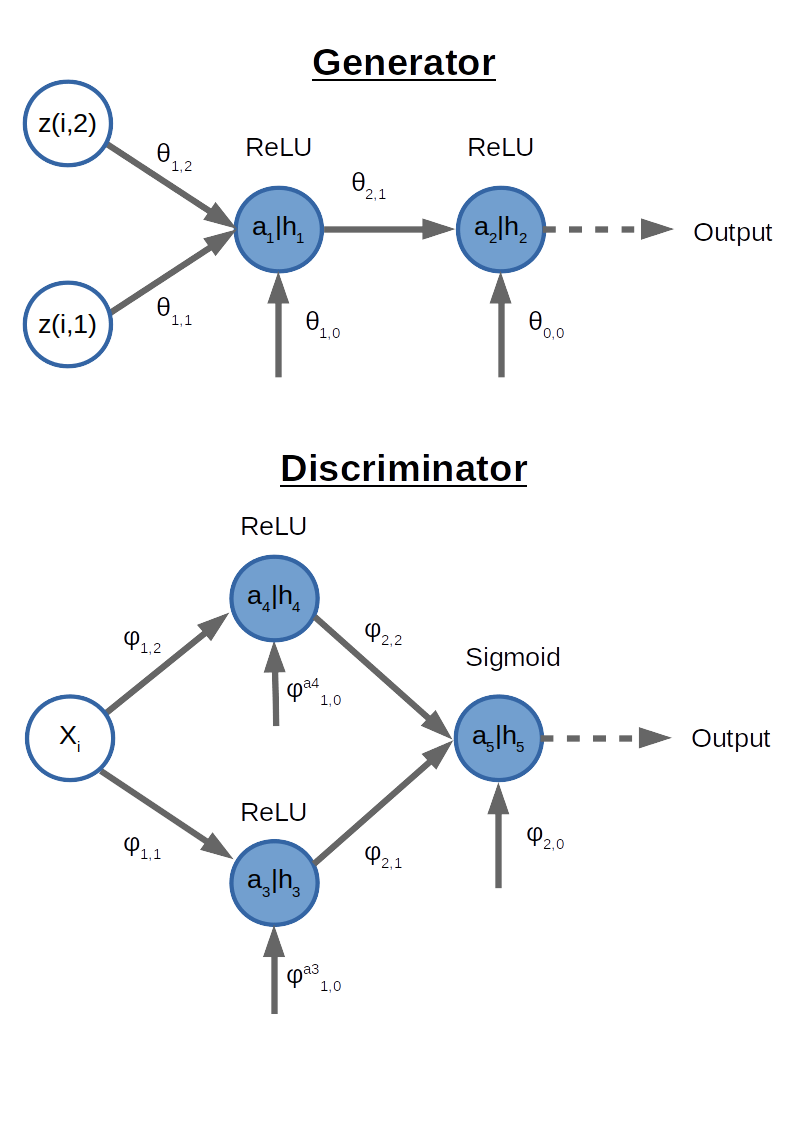

#### solution:

1.
The objective of the discriminator is to maximize:
$$
L_d = \mathbf{E}_{\mathbf{x}\sim p_{data}}log(D_{\mathbf{\psi}}(\mathbf{x})) + \mathbf{E}_{\mathbf{z}~p(\mathbf{z})}log(1-D_{\mathbf{\phi}}(G_{\mathbf{\theta}}(\mathbf{z})))
$$
where $D$ is the discriminator function and $G$ is the generator function, $\mathbf{x}$ represents a data instance sampled from data distribution $p_{data}$, $\mathbf{z}$ is a noise instance sampled from noise distribution $p(\mathbf{z})$. 

And the objective of the generator is to maximize:
$$
L_g = \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})} log(D_{\mathbf{\psi}}(G_{\mathbf{\theta}}(\mathbf{z}))).
$$

One update step is therefore
$$
\{\theta, \psi\}_{\cdot,\cdot} := \{\theta, \psi\}_{\cdot,\cdot} + \lambda \frac{\partial}{\partial \{\theta, \psi\}_{\cdot,\cdot}} \{L_g, L_d\}.
$$

In the following we assume all expectations are convergent series, thus we can swap the order of expectation and derivative operation.

Specifically,

__For the discriminator:__

Let $\sigma(x)$ represent the sigmoid function, then we have

$$
\frac{\partial L_d}{\partial h_5} = \frac{\partial}{\partial h_5}(\mathbf{E}_{\mathbf{x}\sim p_{data}}log(h_5) + \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}log(1-h_5)) = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5} - \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}
$$

$$
\frac{\partial L_d}{\partial \psi_{2,0}} = \frac{\partial L_d}{\partial h_5}\frac{\partial h_5}{\partial a_5}\frac{\partial a_5}{\partial \psi_{2,0}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5)) - \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))
$$

$$
\frac{\partial L_d}{\partial \psi_{2,1}} = \frac{\partial L_d}{\partial h_5}\frac{\partial h_5}{\partial a_5}\frac{\partial a_5}{\partial \psi_{2,1}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5))h_3 - \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))h_3
$$

$$
\frac{\partial L_d}{\partial \psi_{2,2}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5))h_4 - \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))h_4
$$

$$
\frac{\partial L_d}{\partial \psi_{1,0}^{a_3}} = \frac{\partial L_d}{\partial h_5}\frac{\partial h_5}{\partial a_5}\frac{\partial a_5}{\partial h_3}\frac{\partial h_3}{\partial a_3}\frac{\partial a_3}{\partial \psi_{1,0}^{a_3}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,1}\text{ReLU}_{a_3}' -  \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,1}\text{ReLU}_{a_3}'
$$

$$
\frac{\partial L_d}{\partial \psi_{1,0}^{a_4}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,2}\text{ReLU}_{a_4}' -  \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,2}\text{ReLU}_{a_4}'
$$

$$
\frac{\partial L_d}{\partial \psi_{1,1}} = \frac{\partial L_d}{\partial h_5}\frac{\partial h_5}{\partial a_5}\frac{\partial a_5}{\partial h_3}\frac{\partial h_3}{\partial a_3}\frac{\partial a_3}{\partial \psi_{1,1}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,1}\text{ReLU}_{a_3}' \mathbf{x}-  \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,1}\text{ReLU}_{a_3}' G(\mathbf{z})
$$

$$
\frac{\partial L_d}{\partial \psi_{1,2}} = \mathbf{E}_{\mathbf{x}\sim p_{data}}\frac{1}{h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,2}\text{ReLU}_{a_4}' \mathbf{x}-  \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})}\frac{1}{1-h_5}\sigma(h_5)(1-\sigma(h_5))\psi_{2,2}\text{ReLU}_{a_4}' G(\mathbf{z})
$$

Then perform gradient ascent update to each parameter using the gradients above.

__For the generator:__
$$
\frac{\partial L_g}{\partial \theta_{2,0}} = \frac{\partial L_g}{\partial D_{\mathbf{\psi}}} \frac{\partial D_{\mathbf{\psi}}}{\partial G_{\mathbf{\theta}}} \frac{\partial G_{\mathbf{\theta}}}{\partial h_2}\frac{\partial h_2}{\partial a_2}\frac{\partial a_2}{\partial \theta_{2,0}} = \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})} \frac{1}{D_{\mathbf{\psi}}(G_{\mathbf{\theta}}(\mathbf{z}))} \sigma(h_5)(1-\sigma(h_5)) (\psi_{2,2} \text{ReLU}_{a_4}' \psi_{1,2} + \psi_{2,1} \text{ReLU}_{a_3}' \psi_{1,1}) \text{ReLU}_{a_2}'
$$

$$
\frac{\partial L_g}{\partial \theta_{2,1}} = \frac{\partial L_g}{\partial D_{\mathbf{\psi}}} \frac{\partial D_{\mathbf{\psi}}}{\partial G_{\mathbf{\theta}}} \frac{\partial G_{\mathbf{\theta}}}{\partial h_2}\frac{\partial h_2}{\partial a_2}\frac{\partial a_2}{\partial \theta_{2,1}} = \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})} \frac{1}{D_{\mathbf{\psi}}(G_{\mathbf{\theta}}(\mathbf{z}))} \sigma(h_5)(1-\sigma(h_5)) (\psi_{2,2} \text{ReLU}_{a_4}' \psi_{1,2} + \psi_{2,1} \text{ReLU}_{a_3}' \psi_{1,1}) \text{ReLU}_{a_2}'h_1
$$

$$
\frac{\partial L_g}{\partial \theta_{1,0}} = \frac{\partial L_g}{\partial D_{\mathbf{\psi}}} \frac{\partial D_{\mathbf{\psi}}}{\partial G_{\mathbf{\theta}}} \frac{\partial G_{\mathbf{\theta}}}{\partial h_2} \frac{\partial h_2}{\partial a_2} \frac{\partial a_2}{\partial h_1} \frac{\partial h_1}{\partial a_1} \frac{\partial a_1}{\partial \theta_{1,0}} = \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})} \frac{1}{D_{\mathbf{\psi}}(G_{\mathbf{\theta}}(\mathbf{z}))} \sigma(h_5)(1-\sigma(h_5)) (\psi_{2,2} \text{ReLU}_{a_4}' \psi_{1,2} + \psi_{2,1} \text{ReLU}_{a_3}' \psi_{1,1}) \text{ReLU}_{a_2}' \theta_{2,1} \text{ReLU}_{a_1}'
$$

$$
\frac{\partial L_g}{\partial \theta_{1,1}} = \frac{\partial L_g}{\partial D_{\mathbf{\psi}}} \frac{\partial D_{\mathbf{\psi}}}{\partial G_{\mathbf{\theta}}} \frac{\partial G_{\mathbf{\theta}}}{\partial h_2} \frac{\partial h_2}{\partial a_2} \frac{\partial a_2}{\partial h_1} \frac{\partial h_1}{\partial a_1} \frac{\partial a_1}{\partial \theta_{1,0}} = \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})} \frac{1}{D_{\mathbf{\psi}}(G_{\mathbf{\theta}}(\mathbf{z}))} \sigma(h_5)(1-\sigma(h_5)) (\psi_{2,2} \text{ReLU}_{a_4}' \psi_{1,2} + \psi_{2,1} \text{ReLU}_{a_3}' \psi_{1,1}) \text{ReLU}_{a_2}' \theta_{2,1} \text{ReLU}_{a_1}' \mathbf{z}_{(i,1)}
$$

$$
\frac{\partial L_g}{\partial \theta_{1,1}} = \mathbf{E}_{\mathbf{z}\sim p(\mathbf{z})} \frac{1}{D_{\mathbf{\psi}}(G_{\mathbf{\theta}}(\mathbf{z}))} \sigma(h_5)(1-\sigma(h_5)) (\psi_{2,2} \text{ReLU}_{a_4}' \psi_{1,2} + \psi_{2,1} \text{ReLU}_{a_3}' \psi_{1,1}) \text{ReLU}_{a_2}' \theta_{2,1} \text{ReLU}_{a_1}' \mathbf{z}_{(i,2)}
$$

And then perform gradient ascent to the generator.

2.
The $\mathbf{Z}$ is used as the seed of the generator, based on which the generator can output a random fake image to deceive the discriminator so that the discriminator can't tell the difference between the fake image and the real one. The $\mathbf{X}$ is used for sampling the real image, so that the discriminator can learn features from the real images, in order to differentiate them with the fake ones generated by the generator.

In each round of training, we at first generate some random fake images using the generator and match their labels as 'fake'. Then feed them together with real images sampled from the dataset, with which the labels are set to 'real', to the discriminator and train $\psi$-s of it. This is the discriminator-training phase

Then in the generator-training phase, we hold the $\psi$-s in the discriminator still and direct the output of the generator as the input of the discriminator. Then bind the images generated by the generators as 'real' ones hypothetically and feed those deceiving data into the discriminator to update the generators' $\psi$-s.

### 4. Autoencoder programming
1. Please train an autoencoder over the MNIST dataset.
2. Please sample 1000 images and cluster their latent reprensentations using K-means algorithm. How can we possibly interprete its latent representation?
3. Visualize the latent representation of the 1000 sampled images using [T-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

#### solution:
1.

In [11]:
import keras
import numpy as np

from keras import Model
from keras.datasets.mnist import load_data
from keras.layers import Input, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train / 255
x_test = x_test / 255
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [12]:
def image_batch_gen(x, batch_size):
    while True:
        for offset, _ in enumerate(x[0::batch_size]):
            ret_x = x[offset:offset + batch_size]
            ret_x = [d.reshape(28*28,) for d in ret_x]
            ret_x = np.array(ret_x)
            yield ret_x, ret_x

In [37]:
lr = LeakyReLU(0.2)

input_layer = Input(shape=(28*28,))
x = Dense(512, activation=lr)(input_layer)
x = Dense(128, activation=lr)(x)
rep = Dense(64, activation=lr)(x)
x = Dense(128, activation=lr)(rep)
x = Dense(512, activation=lr)(x)
output_layer = Dense(28*28, activation=lr)(x)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

batch_size = 100
steps = len(x_train) / batch_size
val_steps = len(x_val) / batch_size

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2)

train_gen = image_batch_gen(x_train, batch_size)
val_gen = image_batch_gen(x_val, batch_size)
model.fit_generator(train_gen,
                    steps_per_epoch=steps,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    callbacks=[es],
                    epochs=20)

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/20
480/480 [==============================] - 9s 18ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 2/20
480/480 [==============================] - 8s 17ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 3/20
480/480 [==============================] - 8s 18ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 4/20
480/480 [==============================] - 8s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 5/20
480/480 [==============================] - 9s 18ms/step - loss: 7.7889e-04 - mean_squared_error: 7.7889e-04 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 6/20
480/480 [==============================] - 9s 18ms/step - loss: 6.2347e-04 - mean_squared_error: 6.2347e-04 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 

2.

In [38]:
model_repr = Model(input_layer, rep)

sample_idx = np.random.choice([i for i in range(len(x_test))], size=1000, replace=False)
x_sample = x_test[sample_idx]
y_sample = y_test[sample_idx]

rep_output = model_repr.predict_on_batch(x_sample.reshape((1000, 28*28)))

kmeans = KMeans(n_clusters=10, random_state=42, max_iter=100000, tol=1e-6)
clusters = kmeans.fit_predict(rep_output)

In [39]:
num_count  = [len(y_sample[y_sample == i]) for i in range(10)]
cluster_count = [[0 for i in range(10)] for j in range(10)]
for i, j in zip(clusters, y_sample):
    cluster_count[i][j] += 1
cluster_count = np.array(cluster_count)
accuracy_micro = np.array([cluster_count[:, j].max()/c for j, c in enumerate(num_count)]).mean()

In [40]:
accuracy_micro

0.572078483420088

We can see the k-means clustering accuracy is far more than 0.1 (random clusters assignment). We can thence interpret the hidden layer that it maps high-dimensional hand-writting data into a low-dimensional space, so that they are linear separable.

3.

In [41]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set3((y[i] + 1) / 12.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

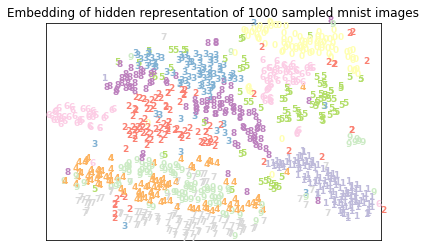

In [43]:
tsne = TSNE(n_components=2, perplexity=50)
rep_ebd = tsne.fit_transform(rep_output)

plot_embedding(rep_ebd, y_sample, 'Embedding of hidden representation of 1000 sampled mnist images')

### 5. Programming for GAN
In the previous problem we train an autoencoder over the MNIST dataset, while in this question we will learn to train a GAN network on it. Please implement your code below and answer the question
1. Train GAN on MNIST.
2. Purterbate any two dims your noise input $\mathbf{Z}$ of the generator. Then assign different values of these two inputs on x- and y-axis and show the images generated regarding to those various values in an image matrix. Please leave comment on your generation

#### solution
1.

In [44]:
import keras
import numpy as np

from keras import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Input, Dropout
from keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train / 255
x_test = x_test / 255

In [45]:
def image_batch_gen(x, batch_size):
    while True:
        for offset, _ in enumerate(x[0::batch_size]):
            ret_x = x[offset:offset + batch_size]
            ret_x = [d.reshape(28*28,) for d in ret_x]
            ret_x = np.array(ret_x)
            yield ret_x, ret_x
            
def set_trainability(model, trainable=False):
    model.trainable = trainable
    for layer in model.layers:
        layer.trainable = trainable

In [46]:
from keras.layers import LeakyReLU, Dropout
from keras.optimizers import Adam

latent_dim = 10

gen_input = Input(shape=(latent_dim,))
x = Dense(64, activation='linear')(gen_input)
x = LeakyReLU(alpha=0.2)(x)
x = Dense(128, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dense(256, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dense(256, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dense(512, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
gen_output = Dense(28 * 28)(x)
generator = Model(gen_input, gen_output)

dis_input = Input(shape=(28 * 28,))
x = Dense(512, activation='linear')(dis_input)
x = LeakyReLU(alpha=0.2)(x)
x = Dense(256, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dense(64, activation='linear')(x)
x = LeakyReLU(alpha=0.2)(x)
dis_output = Dense(1, activation='sigmoid')(x)
discriminator = Model(dis_input, dis_output)
set_trainability(discriminator, True)
discriminator.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='RMSProp')

gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
set_trainability(discriminator, False)
gan.compile(loss='binary_crossentropy', optimizer='RMSProp')

gen_history = []

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [47]:
batch_size = 100
epochs = 3001

valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

data_gen = image_batch_gen(x_train, batch_size)

for epoch in range(epochs):
    X_batch = next(data_gen)[0]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    X_gen = generator.predict(noise)
    # remember to enable the trainability of the discriminator
    set_trainability(discriminator, True)
    d_loss_real = discriminator.train_on_batch(X_batch, valid)
    d_loss_fake = discriminator.train_on_batch(X_gen, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    # and remember to lock the discriminator down during train the generator by training the GAN
    
    set_trainability(discriminator, False)
    g_loss = gan.train_on_batch(noise, valid)

    if epoch % 100 == 0:
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        noise = np.random.normal(0, 1, (batch_size*10, latent_dim))
        X_gen = generator.predict(noise)
        gen_history.append((noise, X_gen))

0 [D loss: 0.754193, acc.: 37.50%] [G loss: 0.729922]
100 [D loss: 0.526197, acc.: 70.50%] [G loss: 1.793859]
200 [D loss: 0.436095, acc.: 79.50%] [G loss: 2.664966]
300 [D loss: 0.472240, acc.: 80.50%] [G loss: 2.307945]
400 [D loss: 0.340641, acc.: 88.00%] [G loss: 3.196038]
500 [D loss: 0.540718, acc.: 74.00%] [G loss: 3.490013]
600 [D loss: 0.959157, acc.: 61.50%] [G loss: 4.396619]
700 [D loss: 0.185042, acc.: 93.00%] [G loss: 7.255718]
800 [D loss: 0.130569, acc.: 95.50%] [G loss: 5.658707]
900 [D loss: 0.153163, acc.: 94.50%] [G loss: 6.194046]
1000 [D loss: 0.084552, acc.: 98.50%] [G loss: 5.253878]
1100 [D loss: 0.284650, acc.: 90.50%] [G loss: 9.293447]
1200 [D loss: 0.978009, acc.: 64.00%] [G loss: 5.762291]
1300 [D loss: 0.139737, acc.: 95.00%] [G loss: 10.317214]
1400 [D loss: 0.216624, acc.: 93.00%] [G loss: 5.989454]
1500 [D loss: 0.158575, acc.: 93.00%] [G loss: 7.003780]
1600 [D loss: 0.027866, acc.: 99.50%] [G loss: 6.298856]
1700 [D loss: 0.070910, acc.: 96.50%] [G l

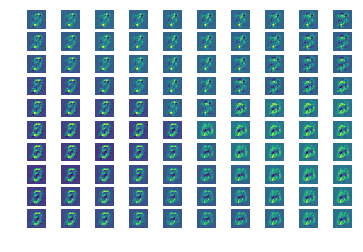

In [59]:
noise = np.random.normal(0, 1, (1, 1, latent_dim))
noise = noise.repeat(10, axis=1).repeat(10, axis=0)
noise[:, :, 9] = np.linspace(-100, 100, 10).repeat(10).reshape((10, 10))
noise[:, :, 1] = np.linspace(-100, 100, 10).repeat(10).reshape((10, 10)).transpose()
plt.figure()
fig, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(generator.predict(noise[i][j].reshape((1, -1))).reshape((28, 28)))
        ax[i][j].axis('off')

We can catch some partten from the image array above that from something like 5-ish in the top-left conner to the 7-ish image in the top-right, and the image like handwritting '0' in the middle. The images vary gradually along each axis (i.e. along the variation of the input value in the 9th and the 1st dimensions).